# Problem 1 (40 points)

A robot is wandering around a room with some obstacles, labeled as $\#$ in the grid below. It can occupy any of the free cells labeled with a letter, but we are uncertain about its true location and thus keep a belief distribution over its current location. At each timestep the robot moves from its current cell in one of the four cardinal directions with uniform probability, and moving toward either a wall or a $\#$ cell will cause the robot to stay in its current cell. For example, starting from A the robot can either stay in A with probability $\frac12$ or move to B or C with probability $\frac14$ each.

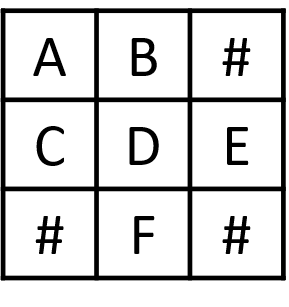

The robot also makes an observation after each transition, returning what it sees in a randomly chosen cardinal direction. Possibilities include observing $\#$, "wall", or "empty" (for a free cell). For example, in C the robot observes "wall", $\#$ (each with probability $\frac14$), or "empty" (with probability $\frac12$).

**Note**: You don't have to show work for solving linear equations or eigenvectors, but please show what equations or matrices you use. Feel free to show your work in Python as well. You may also omit computations that will turn out to be zero based on the provided information.

1.  Suppose that the robot wanders around forever without making observations. What is the stationary distribution over the robot's predicted location? 

2. The initial distribution $X_0$ is uniform over all possible states. The robot makes a transition and observes $e_1 = \#$. It then makes a second transition and again observes $e_2 = \#$. What are the belief distributions $\Pr(X_1 \mid e_1)$ and $\Pr(X_2 \mid e_1, e_2)$?

4. Compute the joint distribution $\Pr(X_1, X_2 \mid e_1, e_2)$. Hint: First determine the state sequences with a nonzero probability.

5. Are the states $X_1$ and $X_2$ independent given $e_1$ and $e_2$? Why or why not? What is the most likely state sequence(s) of $X_1$ and $X_2$?

ENTER YOUR RESPONSES HERE

1. It is $(\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6})$, which is obtained by calculating the normalized eigenvector corresoonding to eigenvalue 1 of the transition matrix. I used Python to do the calculation, and the code is listed below.

2. $\Pr(X_1 \mid e_1) = (0,\frac{1}{6},\frac{1}{6},0,\frac{1}{3},\frac{1}{3})$ \\
$\Pr(X_2 \mid e_1, e_2) = (0,\frac{1}{14},\frac{1}{14},0,\frac{3}{7},\frac{3}{7})$

3. $\Pr(X_1, X_2 \mid e_1, e_2) = \Pr(x_1)\Pr(e_1|x_1)\Pr(x_2 | x_1) \Pr(e_2 | x_2) $ \\
$\Pr(B, B \mid e_1, e_2) = \frac{1}{14}$ \\
$\Pr(C, C \mid e_1, e_2) = \frac{1}{14}$ \\
$\Pr(E, E \mid e_1, e_2) = \frac{3}{7}$ \\
$\Pr(F, F \mid e_1, e_2) = \frac{3}{7}$ \\

4. $\Pr(X_2 | e_1, e_2)= (0,\frac{1}{14},\frac{1}{14},0,\frac{3}{7},\frac{3}{7})$ \\
$\Pr(X_2 | x_1=B, e_1, e_2)= (0,0,1,0,0,0)$ \\
So they are not independent.

In [ ]:
# ENTER ANY CODE FOR THE ABOVE PROBLEM HERE
import numpy as np
import numpy.linalg as nla

#              A    B    C    D    E    F
T = np.array([[1/2, 1/4, 1/4, 0  , 0  , 0  ],
              [1/4, 1/2, 0  , 1/4, 0  , 0  ],
              [1/4, 0  , 1/2, 1/4, 0  , 0  ],
              [0  , 1/4, 1/4, 0  , 1/4, 1/4],
              [0  , 0  , 0  , 1/4, 3/4, 0  ],
              [0  , 0  , 0  , 1/4, 0  , 3/4]])

eval, evec = nla.eig(T)
print("eigenvalues\n", eval)
print("eigenvectors\n", evec[:,2])
print("normalized\n", np.divide(evec[:,2], np.sum(evec[:,2])))

eigenvalues
 [-0.30901699  0.25        1.          0.80901699  0.5         0.75      ]
eigenvectors
 [-0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829]
normalized
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [ ]:
f0 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
#              A    B    C    D    E    F
O = np.array([[0  , 0  , 0  , 0  , 0  , 0  ],
              [0  , 1/4, 0  , 0  , 0  , 0  ],
              [0  , 0  , 1/4, 0  , 0  , 0  ],
              [0  , 0  , 0  , 0  , 0  , 0  ],
              [0  , 0  , 0  , 0  , 1/2, 0  ],
              [0  , 0  , 0  , 0  , 0  , 1/2]])

f1_prime = np.matmul(T, f0)
f1 = np.matmul(O, f1_prime)
print("f1\n", f1)
f1 = np.divide(f1, np.sum(f1))
print("normalized\n", f1)

f2_prime = np.matmul(T, f1)
f2 = np.matmul(O, f2_prime)
print("f2\n", f2)
f2 = np.divide(f2, np.sum(f2))
print("normalized\n", f2)

f1
 [0.         0.04166667 0.04166667 0.         0.08333333 0.08333333]
normalized
 [0.         0.16666667 0.16666667 0.         0.33333333 0.33333333]
f2
 [0.         0.02083333 0.02083333 0.         0.125      0.125     ]
normalized
 [0.         0.07142857 0.07142857 0.         0.42857143 0.42857143]


In [ ]:
p1_prime = np.matmul(T, f0)
p1 = np.matmul(O, f1_prime)
print("p(x1, e1) =\n", p1)

p2_prime = np.multiply(T, p1)
p2 = np.matmul(O, p2_prime)
print("p2")
print(p2)
p2 = np.divide(p2, np.sum(p2))
print("normalized")
print(p2)

p(x1, e1) =
 [0.         0.04166667 0.04166667 0.         0.08333333 0.08333333]
p2
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.00520833 0.         0.         0.         0.        ]
 [0.         0.         0.00520833 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.03125    0.        ]
 [0.         0.         0.         0.         0.         0.03125   ]]
normalized
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.07142857 0.         0.         0.         0.        ]
 [0.         0.         0.07142857 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.42857143 0.        ]
 [0.         0.         0.         0.         0.         0.42857143]]


# POS Tagging

In this assignment you will explore [part-of-speech (POS) tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging), a standard task in natural language processing. The goal is to identify parts of speech and related labels for each word in a given corpus. HMMs are well suited for this problem, with parts of speech being hidden states and the words themselves being observations.

We will be using data from the English EWT treebank from [Universal Dependencies](https://universaldependencies.org/treebanks/en_ewt/index.html), which uses 17 POS tags. We are providing clean versions of training and test data for you. The data format is such that each line contains a word and associated tag, and an empty lines signifies the end of a sentence. Feel free to open the files in a text editor to get an idea.

Start by uploading both files to the Jupyter session storage (you should do this each time that you start a new session). Then run the following code cells.

In [5]:
import numpy as np

def read_sentence(f):
  sentence = []
  while True:
    line = f.readline()
    if not line or line == '\n':
      return sentence
    line = line.strip()
    word, tag = line.split("\t", 1)
    sentence.append((word, tag))

def read_corpus(file):
  f = open(file, 'r', encoding='utf-8')
  sentences = []
  while True:
    sentence = read_sentence(f)
    if sentence == []:
      return sentences
    sentences.append(sentence)

In [6]:
training = read_corpus('train.upos.tsv')
TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 
        'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']
NUM_TAGS = len(TAGS)

alpha = 0.1
tag_counts = np.zeros(NUM_TAGS)
transition_counts = np.zeros((NUM_TAGS,NUM_TAGS))
obs_counts = {}

for sent in training:
  for i in range(len(sent)):
    word = sent[i][0]
    pos = TAGS.index(sent[i][1])
    tag_counts[pos] += 1
    if i < len(sent)-1:
      transition_counts[TAGS.index(sent[i+1][1]), pos] += 1
    if word not in obs_counts:
      obs_counts[word] = np.zeros(NUM_TAGS)
    (obs_counts[word])[pos] += 1

TPROBS = transition_counts / np.sum(transition_counts, axis=0)
OPROBS = {'#UNSEEN': alpha*np.ones(NUM_TAGS) / (tag_counts+alpha)}
for word, counts in obs_counts.items():
  OPROBS[word] = np.divide(counts, tag_counts+alpha)

The preceding cell estimates the parameters of the HMM model by going through all the training data and counting each tag, word, and transition that appears. ```TPROBS``` is the transition matrix, in the form of a 2d numpy array. ```OPROBS``` is a dictionary of 1d numpy arrays, with keys as the words appearing in the training data and their values being 1d numpy arrays of the emission probabilities. 

Notice that we're including one extra "tag" in ```OPROBS```: an ```#UNSEEN``` tag. This is necessary because we will inevitably encounter words in the test dataset that we have not seen before. For any word that we have not seen, we treat it as if the word is just ```#UNSEEN```. We assign the "count" of an ```#UNSEEN``` word to a constant value $\alpha$, so that it acts as Laplacian smoothing.

## Coding 1 (5 points)

Before we build our HMM, let's try a simplistic unigram model: given a new word, assign it the POS tag giving it the highest emission probability. Context of surrounding words is therefore not considered. This can be done by taking the ```argmax``` of the emission probabilities for the given word in OPROBS. Remember that we treat all words that did not appear before as ```#UNSEEN```. Complete the function below to achieve this (make sure to actually return the POS tag itself, not the tag index).

In [13]:
def unigram(obs):
  # Returns the tag of the word obs, as predicted by a unigram model
  # YOUR CODE HERE
  if not obs in OPROBS:
    obs = '#UNSEEN'
  i = np.argmax(OPROBS[obs])
  return TAGS[i]

print(tag_counts)

[12479. 17639. 10549. 12353.  6707. 16287.   688. 34779.  3998.  5567.
 18577. 12946. 23679.  3841.   599. 23072.   847.]


Test out your unigram model by running the cell below, which will tag the specified data and compute accuracy rates over all words and unseen words only. 

In [14]:
def evaluate(sentences, method):
  correct = 0
  correct_unseen = 0
  num_words = 0
  num_unseen_words = 0

  for sentence in sentences:
    words = [sent[0] for sent in sentence]
    pos = [sent[1] for sent in sentence]
    unseen = [word not in OPROBS for word in words]
    if method == 'unigram':
      predict = [unigram(w) for w in words]
    elif method == 'viterbi':
      predict = viterbi(words)
    else:
      print("invalid method!")
      return

    if len(predict) != len(pos):
      print("incorrect number of predictions")
      return
    correct += sum(1 for i,j in zip(pos, predict) if i==j)
    correct_unseen += sum(1 for i,j,k in zip(pos, predict, unseen) if i==j and k)
    num_words += len(words)
    num_unseen_words += sum(unseen)
  
  print("Accuracy rate on all words: ", correct/num_words)
  if num_unseen_words > 0:
    print("Accuracy rate on unseen words: ", correct_unseen/num_unseen_words)

print("Training data evaluation")
evaluate(training, 'unigram')
test = read_corpus('test.upos.tsv')
print("")
print("Test data evaluation")
evaluate(test, 'unigram')

Training data evaluation
Accuracy rate on all words:  0.9066014359235022

Test data evaluation
Accuracy rate on all words:  0.8124875483125473
Accuracy rate on unseen words:  0.003926701570680628


## Response 1 (5 points)

You should see that accuracy on the training data is about 90\%. Accuracy on the test data set is lower at about 81\%, with accuracy on unseen words only being about 0.4\%. What does this last number mean? Your answer should be something like "0.4\% of [GROUP] have a POS tag of [TAG]". Briefly explain your reasoning.

ENTER YOUR RESPONSE HERE

The meaning is that "0.4% of unseen words (the words that do not appear in the keya of OPROBS) have a POS tag of SYM". The reason is that, for each word, we first find its entry in OPROBS to get the list of the probability of it being the certain tag, and then find the tag with the highest probability. If the word is not in OPROBS, we use the entry of '#UNSEEN'. In that list, the tag with the highest probability is the 14th, which is 'SYM'.

Since the probability list of '#UNSEEN' is `alpha*np.ones(NUM_TAGS) / (tag_counts+alpha)`, meaning that the more a tag appears, the less probability it maps to. So as the tag that appears most rarely, 'SYM' whereas has the highest probability, which leads to the fact that we predict all the unseen words as 'SYM', the most rare tag, resulting in the low correct rate.

## Coding 2 (10 points)

We will now implement Viterbi to improve our performance over the unigram model. We will split the implementation into several subroutines. First complete the ```elapse_time``` function below. Given a distribution ```m```, it should return an updated "distribution" that occurs when applying the Viterbi update in one timestep. In addition, it should also return a list with the *indices* of the most likely prior tag for each current tag.

As a hint, these will correspond to ```max``` and ```argmax``` operations, respectively.

In [15]:
def elapse_time(m):
  """
  Given a "message" distribution over tags, return an updated distribution
  after a single timestep using Viterbi update, along with a list of the 
  indices of the most likely prior tag for each current tag
  """
  # mprime = np.zeros(NUM_TAGS)
  # prior_tags = np.zeros(NUM_TAGS, dtype=np.int8)
  #YOUR CODE HERE
  p = np.multiply(m, TPROBS)
  prior_tags = np.argmax(p, axis=1)
  mprime = np.amax(p, axis=1)

  return mprime, prior_tags

m0 = np.ones(NUM_TAGS) /NUM_TAGS
m1_prime, m1_prior_tags = elapse_time(m0)
print(m1_prime)
print(m1_prior_tags)

[0.01300929 0.01230319 0.00834417 0.01870376 0.00654152 0.02120422
 0.00157563 0.03494667 0.04146768 0.00677726 0.02840866 0.0164832
 0.02241779 0.00253611 0.00291206 0.04178426 0.02093562]
[ 5  7  3 10 12  1  6  5 14  3 13 11 16 15 14  9 16]


You can check your implementation above by finding $m_1'$ given $m_0$ where $m_0$ is a uniform distribution. It should approximately look like
```
[0.01300929, 0.01230319, 0.00834417, 0.01870376, 0.00654152,
 0.02120422, 0.00157563, 0.03494667, 0.04146768, 0.00677726,
 0.02840866, 0.0164832 , 0.02241779, 0.00253611, 0.00291206,
 0.04178426, 0.02093562]
```

## Coding 3 (5 points)

The second step of the Viterbi algorithm is to reweight probabilities according to observations. Given the "time elapsed" message distribution ```mprime``` and an ```obs``` (a word), the function below should return an updated distribution weighted by the emission probabilities for this observation. Remember to account for unseen words by using the ```#UNSEEN``` word.

In [16]:
def observe(mprime, obs):
  """
  Given a "message" distribution over tags, return an updated distribution
  by weighting mprime by the emission probabilities corresponding to obs
  """
  # m = np.zeros(NUM_TAGS)
  # YOUR CODE HERE
  if not obs in OPROBS:
    obs = '#UNSEEN'
  m = np.multiply(OPROBS[obs], mprime)
  return m

m1 = observe(m1_prime, '#UNSEEN')
print(m1)

[1.04248647e-07 6.97495062e-08 7.90983910e-08 1.51409439e-07
 9.75313200e-08 1.30190262e-07 2.28982743e-07 1.00481822e-07
 1.03718457e-06 1.21737628e-07 1.52922985e-07 1.27321753e-07
 9.46733027e-08 6.60257072e-08 4.86071760e-07 1.81102981e-07
 2.47144591e-06]


You can check your implementation above by finding $m_1$ given $m_1'$ (from your ```elapse_time``` test above) and an observation of your choosing. If the observation is an ```#UNSEEN``` word, you should find that $m_1$ looks something like 
```
[1.04248647e-07, 6.97495062e-08, 7.90983910e-08, 1.51409439e-07,
 9.75313200e-08, 1.30190262e-07, 2.28982743e-07, 1.00481822e-07,
 1.03718457e-06, 1.21737628e-07, 1.52922985e-07, 1.27321753e-07,
 9.46733027e-08, 6.60257072e-08, 4.86071760e-07, 1.81102981e-07,
 2.47144591e-06]
```

## Coding 4 (20 points)

You will now put the two functions you wrote above together into one wrapper ```viterbi``` function. Given a list of word observations, it should return a corresponding list of predicted tags. As you hopefully recall, Viterbi runs in two phases. The "forward" phase starts with the ```X0``` distribution and goes through the observations one at a time, modifying the message distribution through time and observation updates for each. You should maintain a growing list of most likely tag pointers that is returned from each elapse time update.

The second phase then goes backward. Starting with the tag with the highest likelihood at the end, follow the pointers backward to find the most likely tag for each observation. These tags should then be returned as one overall list of tags when finished (make sure the list of tags is in the right order!).

In [17]:
def viterbi(observations):
  """
  Given a list of word observations, return a list of predicted tags
  """
  m = np.ones(NUM_TAGS)/NUM_TAGS
  # YOUR CODE HERE
  hist = []

  # "Forward" phase of the Viterbi algorithm
  for obs in observations:
    mprime, prio = elapse_time(m)
    hist += prio,
    m = observe(mprime, obs)
  
  # "Backward" phase of the Viterbi algorithm
  i = np.argmax(m)
  ret = [TAGS[i]]
  for j in range(len(hist))[::-1]:
    i = hist[j][i]
    ret += TAGS[i],
  
  return (ret[::-1])[1:]


Again, we recommend that you check your implementation with small test cases. For example, running ```viterbi(['#UNSEEN'])``` (or any unseen word in place of ```#UNSEEN```) should return ```['X']```, which means that we are unable to determine the POS tag for a previously unseen word without any context.

## Response 2 (5 points)

Run your Viterbi implementation on the three phrases below. Explain why the tag prediction is different for the word ```'round'``` in each of them. You can refer to the tag descriptions on UD's [website](https://universaldependencies.org/u/pos/).

In [53]:
print(viterbi(['a', 'round', 'circle']))
print(viterbi(['play', 'another', 'round']))
print(viterbi(['walk', 'round', 'the', 'fence']))

['DET', 'ADJ', 'NOUN']
['VERB', 'DET', 'NOUN']
['VERB', 'ADP', 'DET', 'NOUN']


ENTER YOUR RESPONSE HERE

Since in viterbi, when calculate the probability of each tag, we not only consider the observation, but also consiter the transition matrix. In the first phrase, since the third word is a 'NOUN', so the second word has high probability to be a adjective accoring to the grammar. In the second phrase, since the second word is a 'DET', so the third word has high probability to be a noun accoring to the grammar. In the third phrase, since the fisrt word is a 'VERB', so the second word has high probability to be an adposition accoring to the grammar. In a words, we are considering the context (the words before and after the word we want to predict) now in the Viterbi implementation.

Once you are confident of your implementation, you can run it on the full training and test data sets. You should find that both accuracy rates are better than those of the unigram model, at about 95\% for the training set and (more importantly) 88\% for the test set. What's more, the accuracy rate on unseen words should be about 29\%, a very significant improvement over the unigram predictor.

In [54]:
print("Training data evaluation")
evaluate(training, 'viterbi')
print("")
print("Test data evaluation")
evaluate(test, 'viterbi')

Training data evaluation
Accuracy rate on all words:  0.9520788633819958

Test data evaluation
Accuracy rate on all words:  0.8766784874686218
Accuracy rate on unseen words:  0.293630017452007


Viterbi's performance is held back by its accuracy rate on unseen words. One option is to build a higher-order HMM, e.g. a trigram model with transitions determined by the previous two states rather than one state. 

An alternative fix is to consider the emission probabilities of the ```#UNSEEN``` tag. As you saw in the second coding cell that learns the parameters, the ```#UNSEEN``` tag gets the same count of ```alpha``` for all POS tags. This is equivalent to saying that in a typical corpus, the distribution of unseen words is uniform across all tags. This is not a great assumption; there are probably many more nouns or verbs that we have not encountered than conjunctions or punctuation marks.

Instead of a uniform distribution, it may be more reasonable to assume that the distribution of unseen words is similar to that of words that appear only once in the training set. These words are known as [*hapax legomena*](https://en.wikipedia.org/wiki/Hapax_legomenon).

## Coding 5 (5 points)

Complete the ```hapax_POS_counts``` function below. Given a dictionary ```obs_counts```, which maps a word to a numpy array counting the number of times it occurred as each POS tag, identify all words with a total count of 1. Add up the POS tag occurrences for each of these words, and return the total POS tag counts over all hapax legomena words.

In [19]:
def hapax_POS_counts(obs_counts):
  """
  Given a dictionary of word to count arrays, return the total number 
  of POS tag appearances only for the words with a total count of 1
  """
  hapax = np.zeros(NUM_TAGS)
  # YOUR CODE HERE
  for obs in obs_counts:
    if np.sum(obs_counts[obs]) == 1:
      hapax = np.add(hapax, np.array(obs_counts[obs]))
  print(np.divide(hapax, np.sum(hapax)))
  return hapax

hapax = hapax_POS_counts(obs_counts)

[1.08174304e-01 3.57179304e-03 3.14317788e-02 2.04102459e-03
 4.08204919e-04 1.22461476e-03 5.51076640e-03 3.58608021e-01
 6.38840698e-02 2.04102459e-04 2.95948566e-03 2.18185529e-01
 4.08204919e-03 1.42871722e-03 3.06153689e-03 1.67874273e-01
 2.73497296e-02]


## Response 3 (5 points)

You can check your hapax distribution by verifying that the POS tags of hapax legomena tend to be those associated with a greater diversity of words. Which two POS tags occur most often, and which two POS tags occur least often? Briefly explain, again using some context from the structure of the English language.

YOUR RESPONSE HERE

Least often: CCONJ, PART
Most often: NOUN, PROPN

The reason is that in the text, some words appear more frequently, while some others appear less frequently. The words that are CCONJ (coordinating conjunction) or PART (particle) appear more frequently, since they can always be added without considering what topic the text is talking about. So it is very likely that appear more than once in the text, in different sentances. However, the words that are NOUN (noun) or PROPN (proper noun) appear less frequently, and with a great posibility that they appear only once in the text: they only appear in the first several lines, and then we use pronoun to refer to them. This make them highly likely to be a hapax.


Once you've successfully produced a distribution of hapax legomena POS tags, run the cell below. ```OPROBS``` will be recomputed using the new distribution, and Viterbi will be run again on the test data set. The accuracy rate on all words should see a slight tick up, but the accuracy on unseen words should see a marked improvement to about 45\%. This means that we can correctly tag almost half of words that we have never encountered!

In [71]:
hapax = hapax_POS_counts(obs_counts)
for word, counts in obs_counts.items():
  OPROBS[word] = np.divide(counts, tag_counts + hapax)
OPROBS['#UNSEEN'] = np.divide(hapax, tag_counts + hapax)

print("Test data evaluation")
evaluate(test, 'viterbi')

Test data evaluation
Accuracy rate on all words:  0.8938518548033629
Accuracy rate on unseen words:  0.4493891797556719
